In [58]:
#https://data.mendeley.com/datasets/z9zw7nt5h2/1
#https://www.cs.jhu.edu/~mdredze/datasets/sentiment/

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [60]:
# df = pd.read_csv('Twitter_Data.csv', header=0)  # Header=0 to use the first row as column names

df = pd.read_parquet("train-00000-of-00001.parquet")

# Extract only the relevant columns
df = df[["text", "label"]]

df.head(10)

,text,label
0,Last study day tomorrow before my last exam ;o...,1
1,@luislanz the iphone 2g only supports bt audio...,0
2,@alejandradd IT IS!!! And YOU live in South ...,1
3,merlin is a funny show...i have maths exam thi...,0
4,"@ConverseSniffer Heyyyy, I'm a....... Twittere...",1
5,Home from Ikea with the Wife and its curry nig...,1
6,has a headache ... and right before evening se...,0
7,@Azlen not in my family,1
8,@renzz hehe you aint the only one up early today,1
9,"I hate this unusual Wether, somedays is hot as...",0


In [61]:
print("Amount of columns: ", df.shape[0])
print(df.isnull().sum())

Amount of columns:  1568627
text     0
label    0
dtype: int64


In [62]:
# Remove rows with missing data
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# convert the label column to integers
df["label"] = df["label"].astype(int)

print("Amount of columns: ", df.shape[0])

Amount of columns:  1568627


In [63]:
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# nltk.download("stopwords")
# nltk.download("wordnet")

# def preprocess_text(text):
#     text = text.lower()
#     text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
#     text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters but keep spaces
#     text = re.sub(r"\d+", "", text)  # Remove numbers
#     text = re.sub(r"\s+", " ", text).strip()  # Keep single spaces

#     tokens = text.split()  # Tokenize by spaces
#     stop_words = set(stopwords.words("english"))
#     tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    
#     lemmatizer = WordNetLemmatizer()
#     tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization

#     return " ".join(tokens)  # Join tokens back into a sentence

# df["clean_text"] = df["text"].apply(preprocess_text)


In [ ]:
X = df['text']
y = df['label'] # -1 neagtive, 0 neutral, 1 positive

# Vectorize the text data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=20000, sublinear_tf=True)  # Unigrams & bigrams
X_vectors = vectorizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

KeyError: 'clean_text'

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


params = {"alpha": [0.001, 0.01, 0.05, 0.1, 1.0] }
grid = GridSearchCV(MultinomialNB(), param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train_resampled, y_train_resampled)


print("Best alpha:", grid.best_params_)


Best alpha: {'alpha': 1.0}


In [ ]:
# Train the model
model = MultinomialNB(alpha=grid.best_params_["alpha"], class_prior=[0.5, 0.5] )
model.fit(X_train_resampled, y_train_resampled)

MultinomialNB(class_prior=[0.5, 0.5])

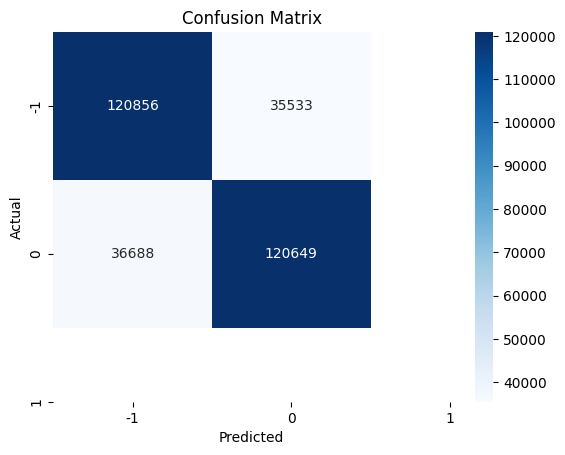

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7697959365816031
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77    156389
           1       0.77      0.77      0.77    157337

    accuracy                           0.77    313726
   macro avg       0.77      0.77      0.77    313726
weighted avg       0.77      0.77      0.77    313726



In [50]:
df.head(10)


,text,label,clean_text
0,Last study day tomorrow before my last exam ;o...,1,last study day tomorrow last exam gnight
1,@luislanz the iphone 2g only supports bt audio...,0,luislanz iphone g support bt audio device leas...
2,@alejandradd IT IS!!! And YOU live in South ...,1,alejandradd live south america
3,merlin is a funny show...i have maths exam thi...,0,merlin funny showi math exam week gay gay gay ...
4,"@ConverseSniffer Heyyyy, I'm a....... Twittere...",1,conversesniffer heyyyy im twitterer okayx
5,Home from Ikea with the Wife and its curry nig...,1,home ikea wife curry night friend tonight pikl...
6,has a headache ... and right before evening se...,0,headache right evening service begin
7,@Azlen not in my family,1,azlen family
8,@renzz hehe you aint the only one up early today,1,renzz hehe aint one early today
9,"I hate this unusual Wether, somedays is hot as...",0,hate unusual wether somedays hot hell others c...
